# Random Forest

# Dataset Description:

#Use the Glass dataset and apply the Random forest model.


In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Loading Dataset
df = pd.read_csv('glass.csv')

# 1. Exploratory Data Analysis (EDA):
& Data Preprocessing

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.00,0.00,1
182,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6
52,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00,1
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.00,2
68,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
48,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00,0.00,1
99,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,2
174,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5
92,1.51588,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19,2
81,1.51593,13.25,3.45,1.43,73.17,0.61,7.86,0.00,0.00,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
# Use numpy to convert to arrays
import numpy as np
import seaborn as sns 
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df.shape

(214, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [12]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [13]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [14]:
# checking for null values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
df['Type'] = df['Type'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   Type    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


# 2: Data Visualization:

In [17]:
df_numeric = df.drop('Type', axis=1)

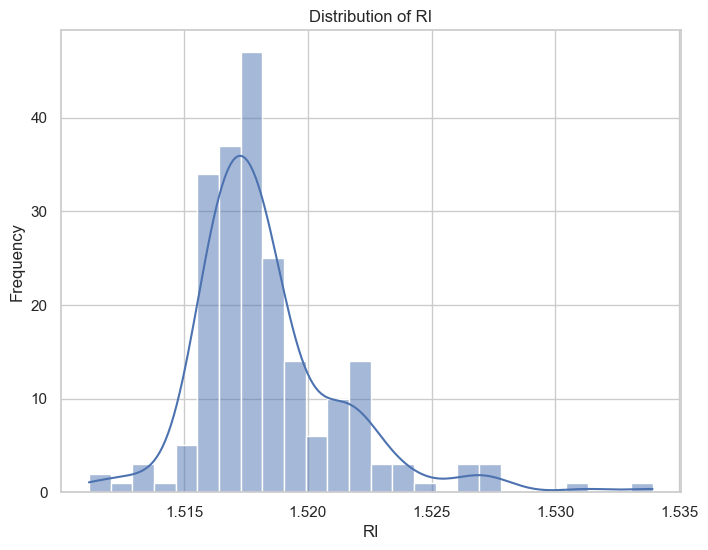

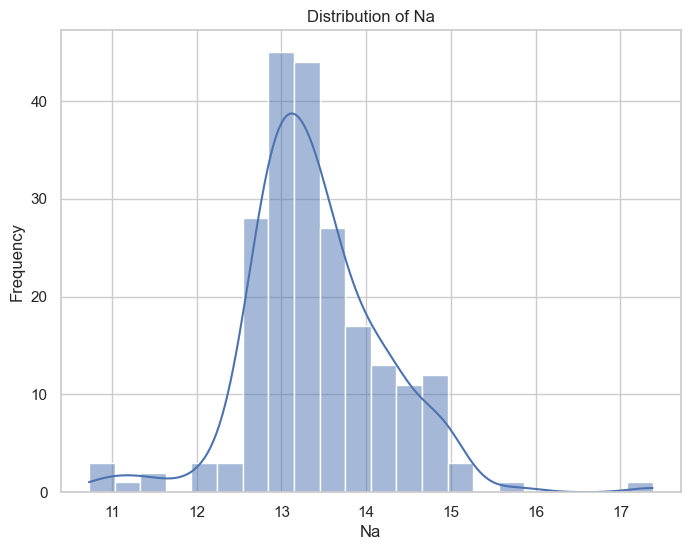

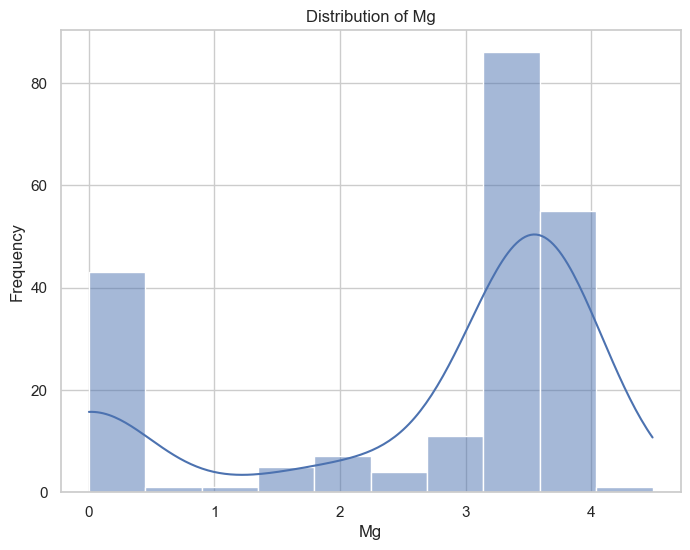

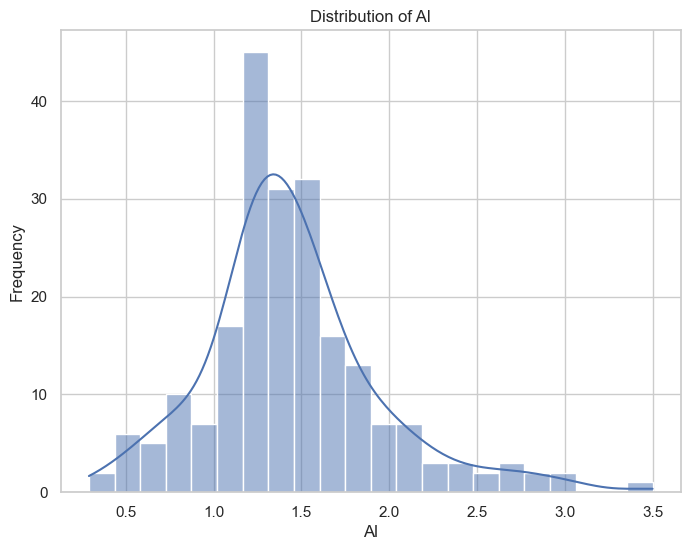

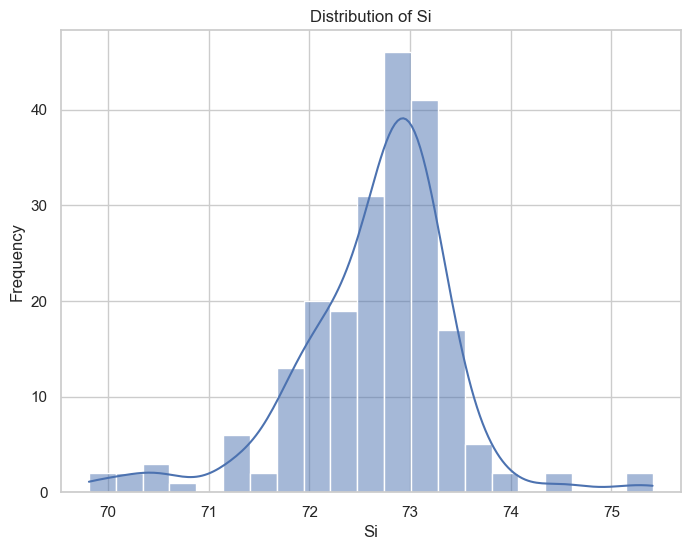

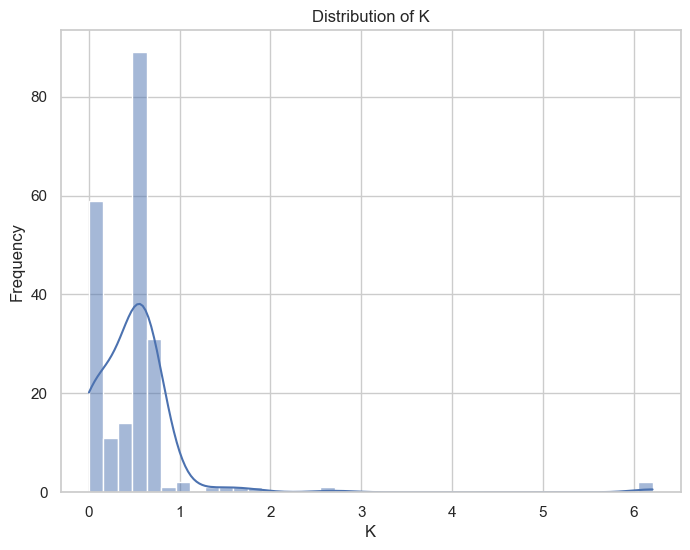

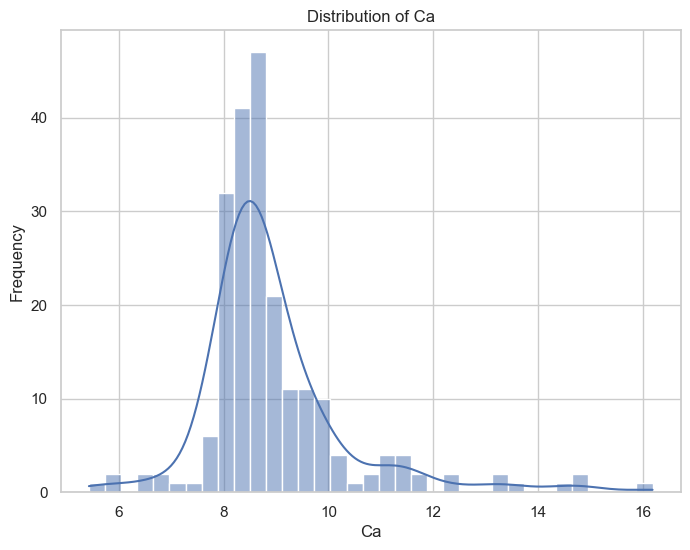

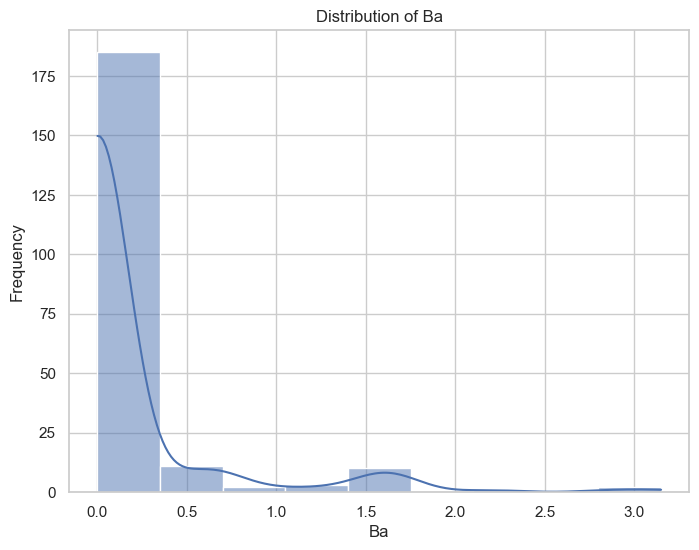

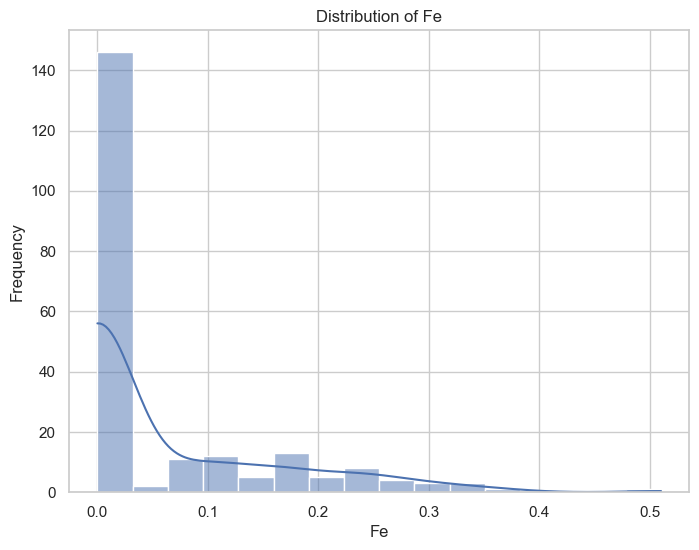

In [18]:
# Set the style
sns.set(style="whitegrid")

# Plot histograms for each numeric column
for column in df_numeric.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

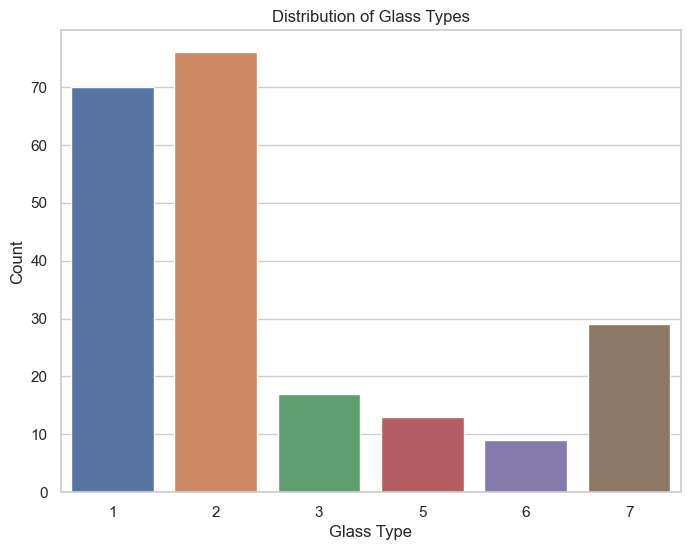

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

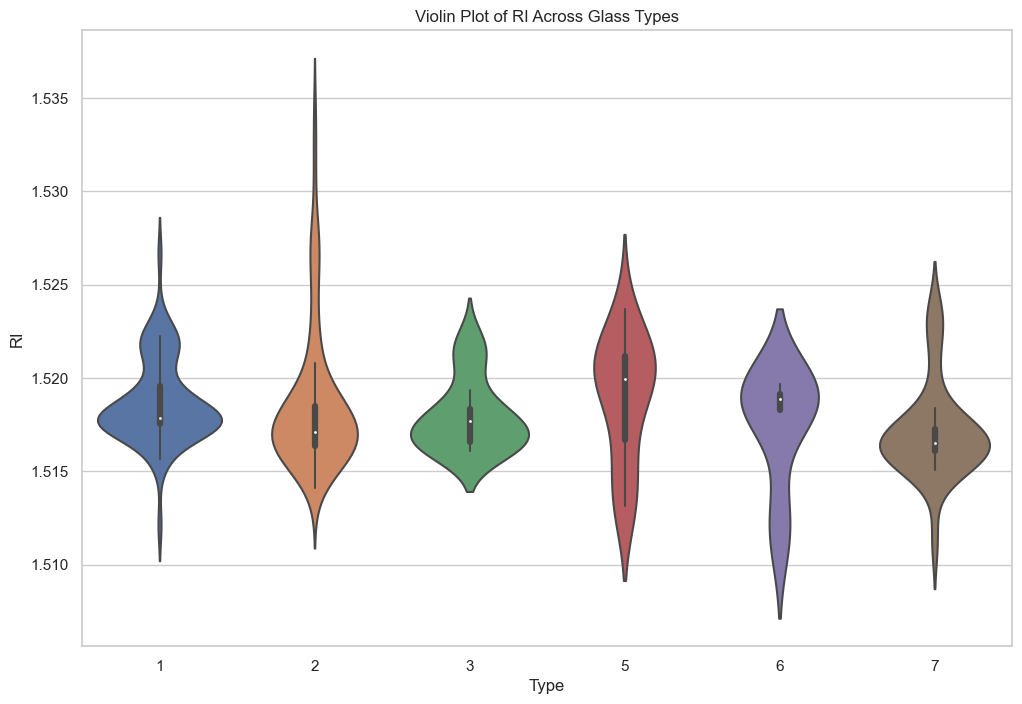

In [20]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Type', y='RI')
plt.title('Violin Plot of RI Across Glass Types')
plt.show()

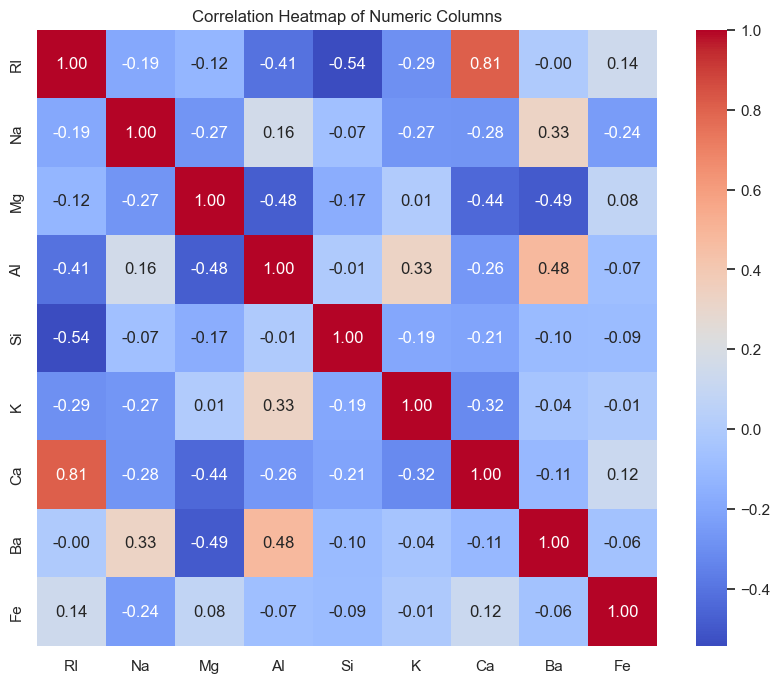

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

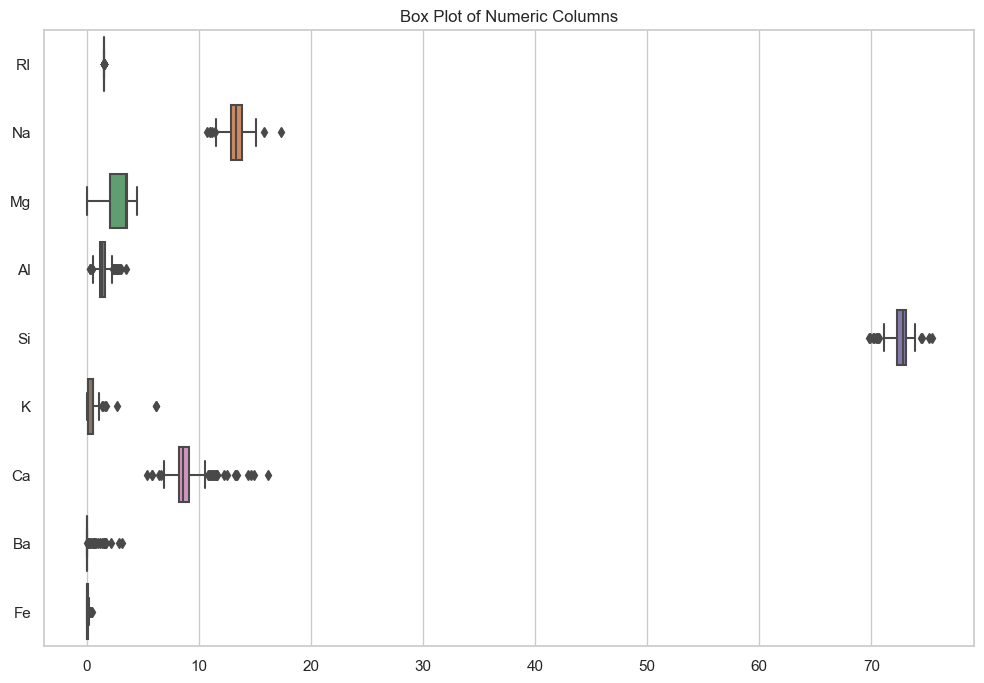

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_numeric, orient='h')
plt.title('Box Plot of Numeric Columns')
plt.show()

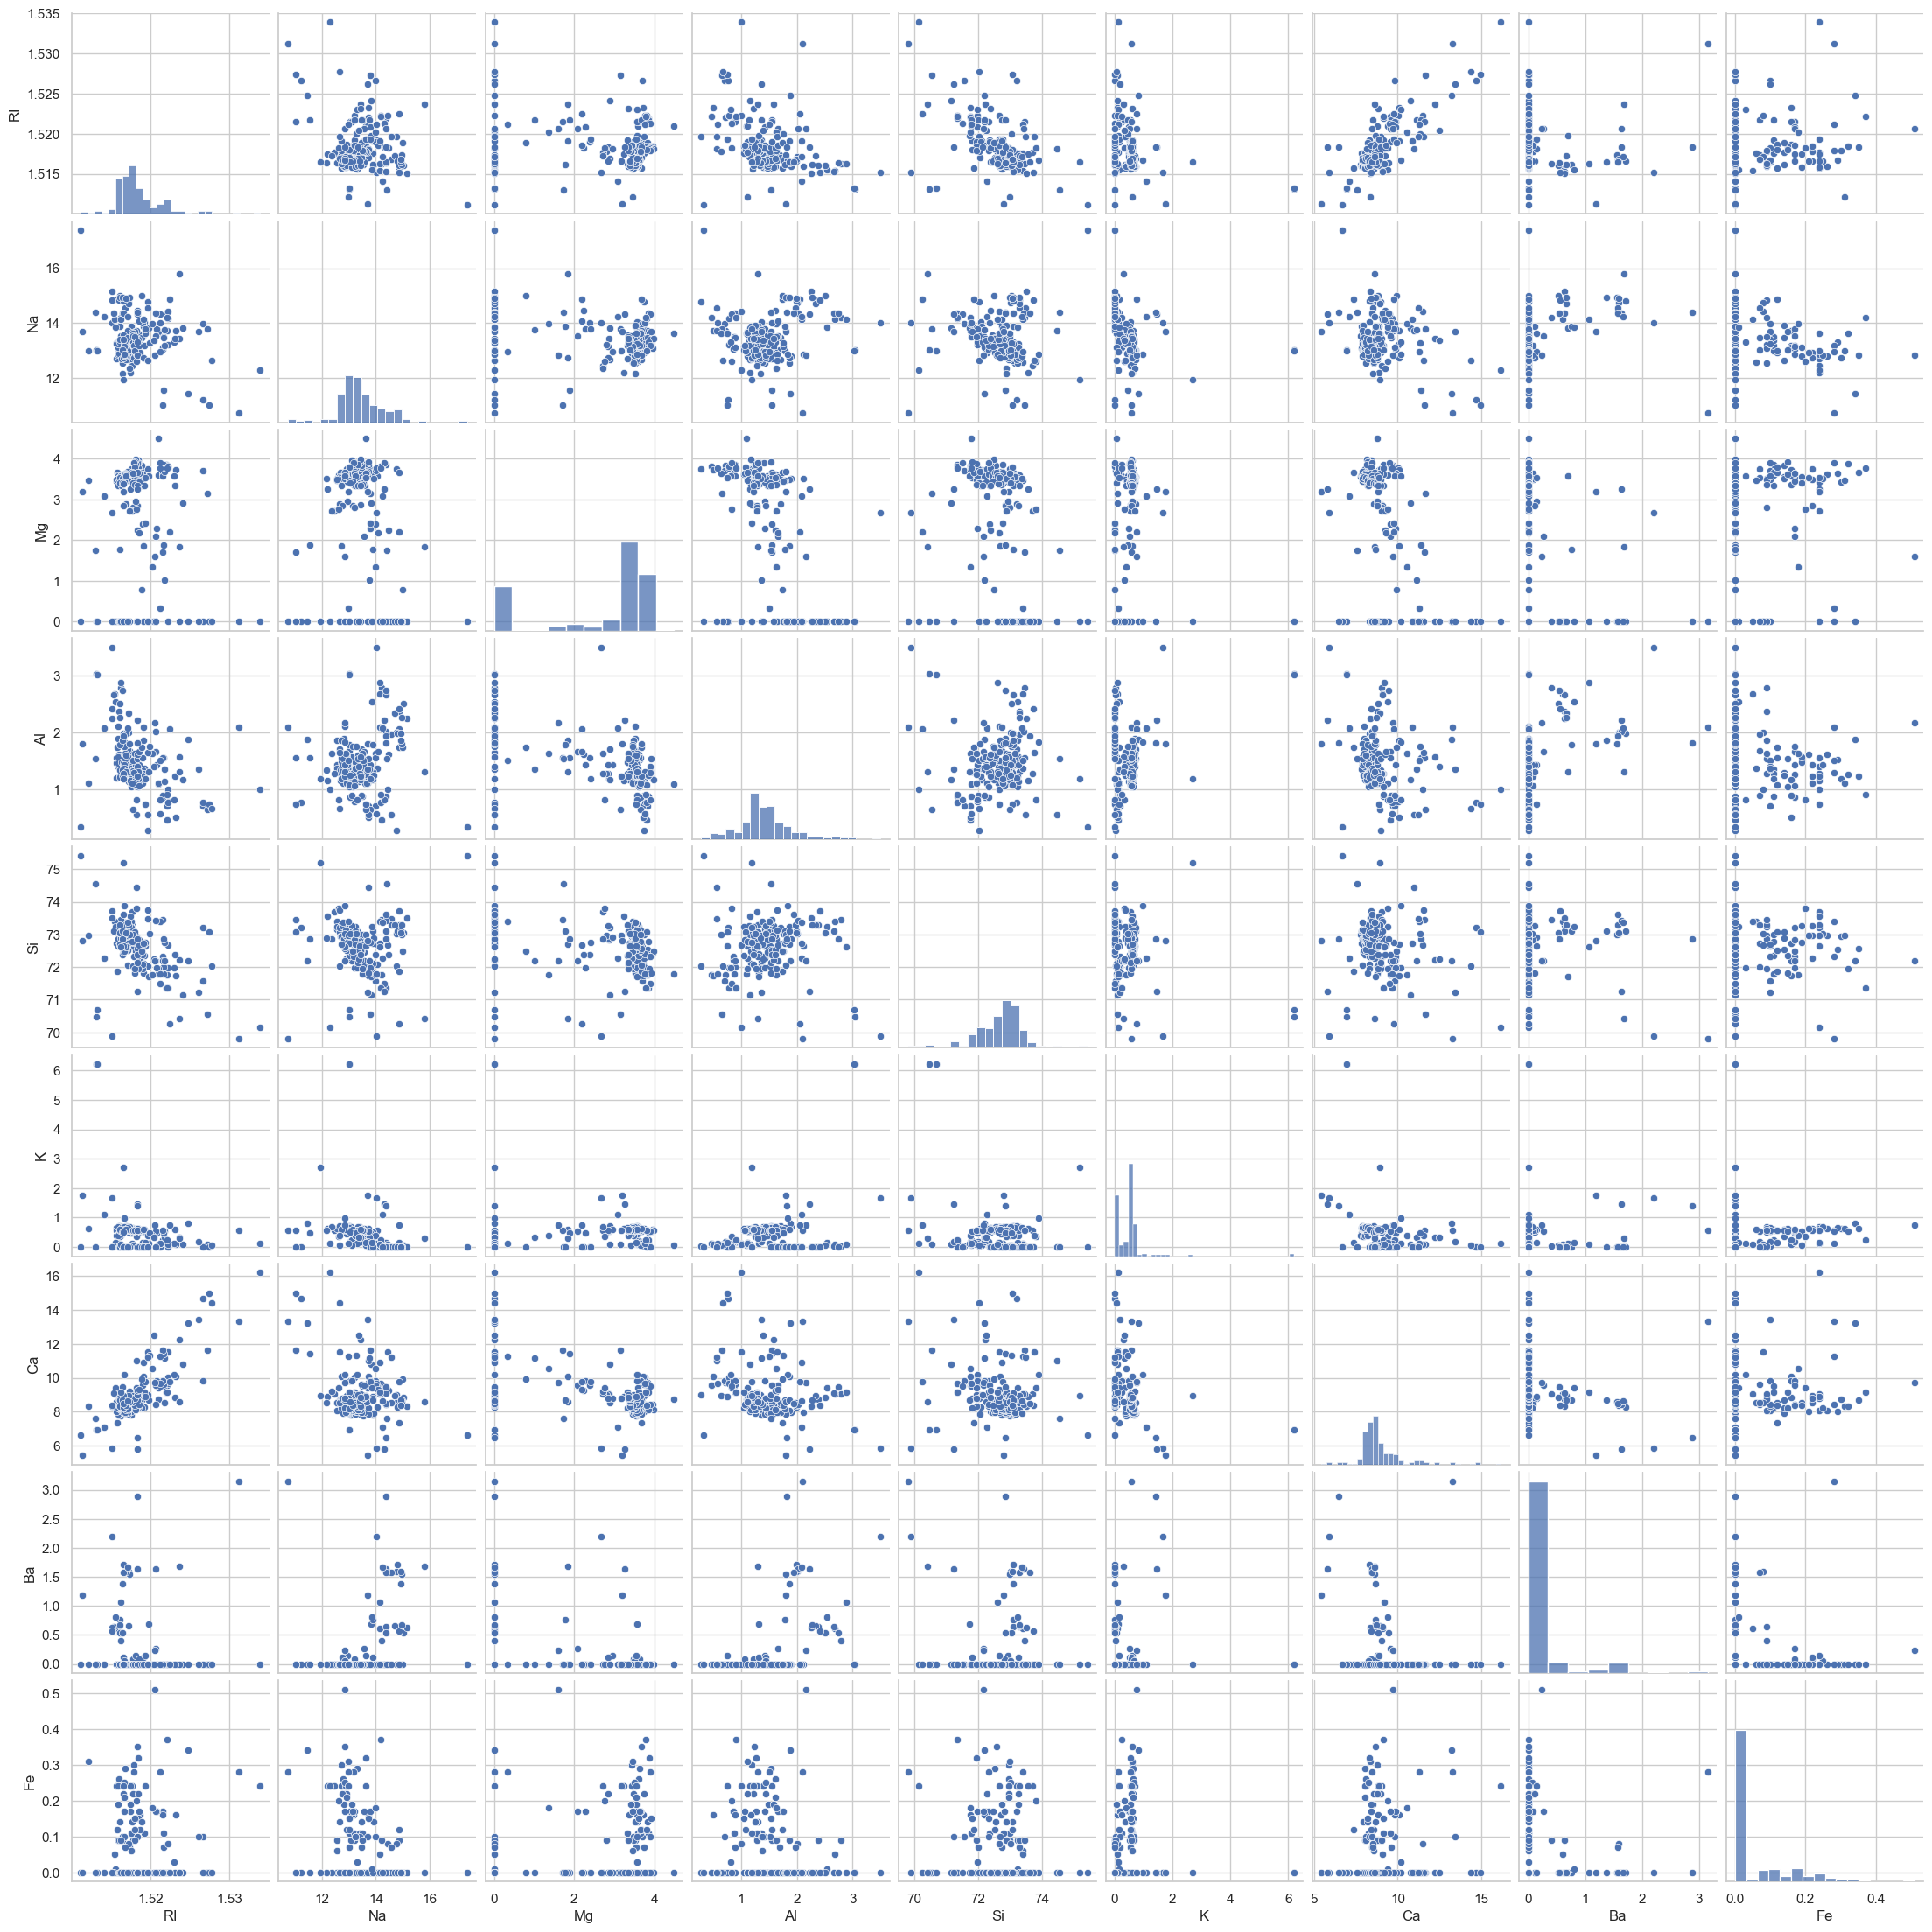

In [23]:
sns.pairplot(df)

In [24]:
#Declare feature vector and target variable

In [25]:
X = df.drop(['Type'], axis=1)

y = df['Type']

In [26]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

In [27]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((171, 9), (43, 9))

In [28]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rf = RandomForestClassifier(random_state=100)


# fit the model

rf.fit(X_train, y_train)
# Predict the Test set results

y_pred = rf.predict(X_test)


# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8605


In [29]:
# instantiate the classifier with n_estimators = 50

rfc_50 = RandomForestClassifier(n_estimators=50, random_state=100)



# fit the model to the training set

rfc_50.fit(X_train, y_train)
# Predict on the test set results

y_pred_50 = rfc_50.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_50)))

Model accuracy score with 100 decision-trees : 0.8837


In [30]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=100)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8605


In [31]:
# view the feature scores

feature_scores = pd.Series(rfc_50.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Al    0.171358
Mg    0.156198
RI    0.140786
Ca    0.118390
Na    0.105934
K     0.102981
Si    0.091386
Ba    0.074211
Fe    0.038755
dtype: float64

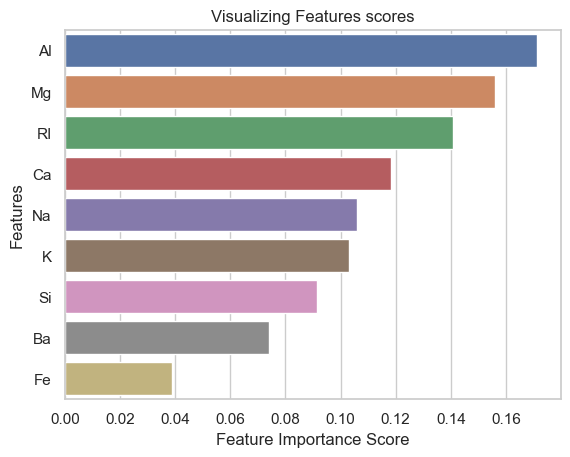

In [32]:
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
# Set the style
sns.set(style="darkgrid")
plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Visualizing Features scores")

plt.show()

In [33]:
X = df.drop(['Type', 'Fe'], axis=1)

y = df['Type']

In [34]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [35]:
# instantiate the classifier with n_estimators = 100
rf_new = RandomForestClassifier(n_estimators=100,random_state=100)

# fit the model to the training set
rf_new.fit(X_train, y_train)

# Predict on the test set results

y_pred = rf_new.predict(X_test)

# Check accuracy score 

print('Model accuracy score with Fe variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with Fe variable removed : 0.8372


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_50))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       0.94      0.89      0.92        19
           3       0.50      0.33      0.40         3
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       0.83      1.00      0.91         5

    accuracy                           0.88        43
   macro avg       0.85      0.84      0.84        43
weighted avg       0.88      0.88      0.88        43



In [37]:
#Confusion Matrix

In [38]:
# Print the Confusion Matrix and slice it into four categories

from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_test, y_pred_50)

print('Confusion matrix\n\n', cm_1)

Confusion matrix

 [[10  0  0  0  0  0]
 [ 1 17  1  0  0  0]
 [ 1  1  1  0  0  0]
 [ 0  0  0  4  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  5]]


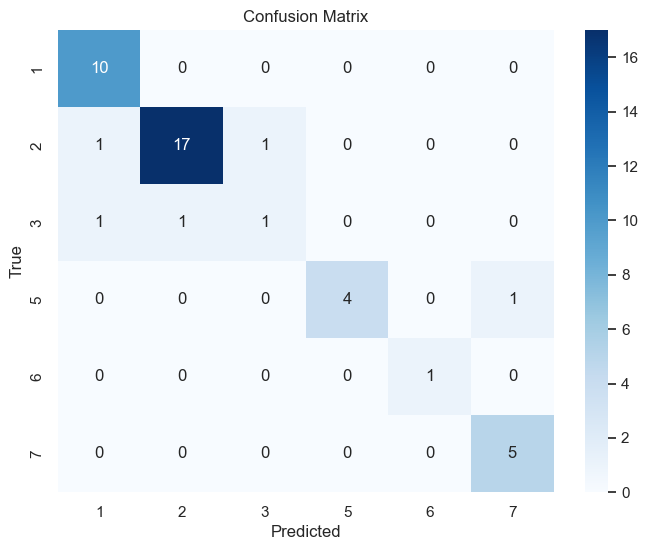

In [39]:
# Create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap( cm_1, annot=True, fmt="d", cmap="Blues", xticklabels= df['Type'].unique(), yticklabels=df['Type'].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [40]:
df = pd.read_csv('glass.csv')

In [41]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Splitting data into train and test data

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 8)
(71, 8)
(143,)
(71,)


# Random Forest Classification

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 'auto'
skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [49]:
# Train the model on training data
model.fit(x_train, y_train)

RandomForestClassifier(max_features='auto')

In [56]:
from sklearn.model_selection import KFold
seed = 7
cart = DecisionTreeClassifier()
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
results = cross_val_score(model, x_train, y_train, cv=kfold)
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=seed) #Classifier
#results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7


In [58]:
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7


# Bagged Decision Trees for Classification

In [59]:
from sklearn.ensemble import BaggingClassifier

skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.6857142857142857


# AdaBoost Classification

In [61]:
from sklearn.ensemble import AdaBoostClassifier

skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = AdaBoostClassifier(n_estimators=10, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.3704761904761905
